In [4]:
# ============================================
# TELECOM KPI AUTOMATION - GOOGLE COLAB NOTEBOOK
# ============================================

#@title 📊 **1. INSTALL REQUIRED PACKAGES**
!pip install pandas numpy matplotlib seaborn plotly openpyxl -q

print("✅ Packages installed successfully!")

#@title 📝 **2. UPLOAD YOUR TELECOM KPI DATA**
from google.colab import files
import io
import pandas as pd
import numpy as np

print("📤 Please upload your Telecom KPI data file (CSV or Excel):")
uploaded = files.upload()

# Get uploaded filename
filename = list(uploaded.keys())[0]
print(f"\n✅ File uploaded successfully!")
print(f"📄 File name: {filename}")
print(f"📊 File size: {len(uploaded[filename]) / 1024:.1f} KB")

✅ Packages installed successfully!
📤 Please upload your Telecom KPI data file (CSV or Excel):


Saving raw_data.xlsx to raw_data (1).xlsx

✅ File uploaded successfully!
📄 File name: raw_data (1).xlsx
📊 File size: 133.1 KB


In [5]:
#@title 🚀 **3. LOAD AND EXPLORE DATA**
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data based on file type
print("📂 Loading your telecom data...")
if filename.endswith('.csv'):
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
elif filename.endswith(('.xlsx', '.xls')):
    df = pd.read_excel(io.BytesIO(uploaded[filename]))
else:
    raise ValueError("❌ Unsupported file format. Please upload CSV or Excel file.")

print("=" * 70)
print("📊 TELECOM KPI DATA OVERVIEW")
print("=" * 70)
print(f"📈 Total Records: {len(df):,}")
print(f"📋 Total Columns: {len(df.columns)}")
print(f"\n📅 Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"🔧 Technologies: {', '.join(df['Technology'].unique())}")
print(f"📍 Regions: {', '.join(df['Region'].unique())}")
print(f"📊 Total Sites: {df['Site_ID'].nunique()}")

print("\n📋 Data Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print("\n📊 First 5 rows:")
display(df.head())

print("\n📈 Data Info:")
print(df.info())

📂 Loading your telecom data...
📊 TELECOM KPI DATA OVERVIEW
📈 Total Records: 1,920
📋 Total Columns: 11

📅 Date Range: 2025-01-01 00:00:00 to 2025-03-01 00:00:00
🔧 Technologies: 4G, 3G, 2G
📍 Regions: North, South, East, West
📊 Total Sites: 1489

📋 Data Columns:
    1. Date
    2. Week
    3. Region
    4. Site_ID
    5. Technology
    6. CSSR
    7. DCR
    8. HOSR
    9. Traffic_Erlang
   10. Avg_Throughput
   11. PRB_Utilization

📊 First 5 rows:


,Date,Week,Region,Site_ID,Technology,CSSR,DCR,HOSR,Traffic_Erlang,Avg_Throughput,PRB_Utilization
0,2025-01-01,1,North,N-202,4G,95.92,1.58,95.37,250.6,5.8,54.4
1,2025-01-01,1,North,N-472,4G,98.54,0.14,98.73,424.6,10.1,33.6
2,2025-01-01,1,North,N-376,4G,98.06,0.11,90.21,286.1,17.2,23.5
3,2025-01-01,1,North,N-799,3G,97.28,1.59,91.80,281.4,24.5,23.5
4,2025-01-01,1,North,N-918,4G,97.25,0.13,98.48,303.5,16.6,21.2



📈 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1920 non-null   datetime64[ns]
 1   Week             1920 non-null   int64         
 2   Region           1920 non-null   object        
 3   Site_ID          1920 non-null   object        
 4   Technology       1920 non-null   object        
 5   CSSR             1920 non-null   float64       
 6   DCR              1920 non-null   float64       
 7   HOSR             1920 non-null   float64       
 8   Traffic_Erlang   1920 non-null   float64       
 9   Avg_Throughput   1920 non-null   float64       
 10  PRB_Utilization  1920 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 165.1+ KB
None


In [6]:
#@title 🔧 **4. DATA CLEANING & PREPROCESSING**
print("=" * 70)
print("🧹 DATA CLEANING & PREPROCESSING")
print("=" * 70)

# Create a copy for cleaning
df_clean = df.copy()

# Convert Date column to datetime
if 'Date' in df_clean.columns:
    df_clean['Date'] = pd.to_datetime(df_clean['Date'])
    print(f"✅ Date column converted")
    print(f"   • From: {df_clean['Date'].min().date()} to {df_clean['Date'].max().date()}")
    print(f"   • Total days: {(df_clean['Date'].max() - df_clean['Date'].min()).days} days")

# 1. Check for missing values
print("\n🔍 Checking for missing values...")
missing_data = df_clean.isnull().sum()
total_missing = missing_data.sum()

if total_missing > 0:
    print(f"⚠️  Found {total_missing} missing values:")
    for col, count in missing_data[missing_data > 0].items():
        percentage = (count / len(df_clean)) * 100
        print(f"   • {col}: {count} missing ({percentage:.1f}%)")

    # Fill missing values for KPI columns
    kpi_columns = ['CSSR', 'DCR', 'HOSR', 'Traffic_Erlang', 'Avg_Throughput', 'PRB_Utilization']
    for col in kpi_columns:
        if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
            print(f"   🔧 Filled missing values in {col}")
else:
    print("✅ No missing values found")

# 2. Remove duplicate records
print("\n🔍 Checking for duplicates...")
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_count - len(df_clean)

if duplicates_removed > 0:
    print(f"🗑️  Removed {duplicates_removed} duplicate records")
else:
    print("✅ No duplicates found")

# 3. Data validation and correction
print("\n🔍 Validating data ranges...")
data_issues_fixed = 0

# CSSR should be between 0-100%
if 'CSSR' in df_clean.columns:
    invalid_cssr = df_clean[(df_clean['CSSR'] < 0) | (df_clean['CSSR'] > 100)]
    if len(invalid_cssr) > 0:
        print(f"   • Fixed {len(invalid_cssr)} CSSR values out of range (0-100%)")
        df_clean['CSSR'] = df_clean['CSSR'].clip(0, 100)
        data_issues_fixed += len(invalid_cssr)

# DCR should be >= 0
if 'DCR' in df_clean.columns:
    invalid_dcr = df_clean[df_clean['DCR'] < 0]
    if len(invalid_dcr) > 0:
        print(f"   • Fixed {len(invalid_dcr)} negative DCR values")
        df_clean['DCR'] = df_clean['DCR'].clip(lower=0)
        data_issues_fixed += len(invalid_dcr)

# 4. Create additional features
print("\n🎯 Creating additional features...")

# Technology mapping
tech_names = {'2G': 'GSM', '3G': 'UMTS/HSPA', '4G': 'LTE', '5G': 'NR'}
df_clean['Technology_Name'] = df_clean['Technology'].map(tech_names)

# Region mapping
region_names = {'North': 'Northern', 'South': 'Southern', 'East': 'Eastern', 'West': 'Western'}
df_clean['Region_Name'] = df_clean['Region'].map(region_names)

# Extract date features
if 'Date' in df_clean.columns:
    df_clean['Month'] = df_clean['Date'].dt.month
    df_clean['Day_Name'] = df_clean['Date'].dt.day_name()
    df_clean['Month_Name'] = df_clean['Date'].dt.strftime('%B')
    df_clean['Year'] = df_clean['Date'].dt.year
    df_clean['Day_of_Month'] = df_clean['Date'].dt.day
    print(f"   • Added date features: Month, Day Name, Year")

print("\n✅ Data cleaning completed!")
print(f"📊 Original shape: {df.shape}")
print(f"📊 Cleaned shape: {df_clean.shape}")
print(f"🔧 Issues fixed: {data_issues_fixed}")
print(f"🧹 Duplicates removed: {duplicates_removed}")

print("\n📋 Sample of cleaned data:")
display(df_clean[['Date', 'Site_ID', 'Technology', 'Region', 'CSSR', 'DCR', 'HOSR']].head())

🧹 DATA CLEANING & PREPROCESSING
✅ Date column converted
   • From: 2025-01-01 to 2025-03-01
   • Total days: 59 days

🔍 Checking for missing values...
✅ No missing values found

🔍 Checking for duplicates...
✅ No duplicates found

🔍 Validating data ranges...

🎯 Creating additional features...
   • Added date features: Month, Day Name, Year

✅ Data cleaning completed!
📊 Original shape: (1920, 11)
📊 Cleaned shape: (1920, 18)
🔧 Issues fixed: 0
🧹 Duplicates removed: 0

📋 Sample of cleaned data:


,Date,Site_ID,Technology,Region,CSSR,DCR,HOSR
0,2025-01-01,N-202,4G,North,95.92,1.58,95.37
1,2025-01-01,N-472,4G,North,98.54,0.14,98.73
2,2025-01-01,N-376,4G,North,98.06,0.11,90.21
3,2025-01-01,N-799,3G,North,97.28,1.59,91.80
4,2025-01-01,N-918,4G,North,97.25,0.13,98.48


In [7]:
#@title 📈 **5. KPI CALCULATIONS & METRICS (FIXED)**
print("=" * 70)
print("📊 KPI CALCULATIONS & PERFORMANCE METRICS")
print("=" * 70)

# Telecom KPI Standards (3GPP based)
KPI_STANDARDS = {
    'CSSR': {'Excellent': 98, 'Good': 95, 'Poor': 90, 'Critical': 85},
    'DCR': {'Excellent': 0.5, 'Good': 1.0, 'Poor': 2.0, 'Critical': 5.0},
    'HOSR': {'Excellent': 98, 'Good': 95, 'Poor': 90, 'Critical': 85},
    'PRB_Utilization': {'Excellent': 70, 'Good': 85, 'Poor': 95, 'Critical': 100},
    'Avg_Throughput': {'Excellent': 20, 'Good': 10, 'Poor': 5, 'Critical': 2}
}

def calculate_kpi_status(df):
    """Calculate KPI status based on telecom standards"""
    df = df.copy()

    # CSSR Status
    if 'CSSR' in df.columns:
        df['CSSR_Status'] = 'Critical'  # Default value
        df.loc[df['CSSR'] >= KPI_STANDARDS['CSSR']['Excellent'], 'CSSR_Status'] = 'Excellent'
        df.loc[(df['CSSR'] >= KPI_STANDARDS['CSSR']['Good']) &
               (df['CSSR'] < KPI_STANDARDS['CSSR']['Excellent']), 'CSSR_Status'] = 'Good'
        df.loc[(df['CSSR'] >= KPI_STANDARDS['CSSR']['Poor']) &
               (df['CSSR'] < KPI_STANDARDS['CSSR']['Good']), 'CSSR_Status'] = 'Poor'

    # DCR Status (lower is better)
    if 'DCR' in df.columns:
        df['DCR_Status'] = 'Critical'  # Default value
        df.loc[df['DCR'] <= KPI_STANDARDS['DCR']['Excellent'], 'DCR_Status'] = 'Excellent'
        df.loc[(df['DCR'] <= KPI_STANDARDS['DCR']['Good']) &
               (df['DCR'] > KPI_STANDARDS['DCR']['Excellent']), 'DCR_Status'] = 'Good'
        df.loc[(df['DCR'] <= KPI_STANDARDS['DCR']['Poor']) &
               (df['DCR'] > KPI_STANDARDS['DCR']['Good']), 'DCR_Status'] = 'Poor'

    # HOSR Status
    if 'HOSR' in df.columns:
        df['HOSR_Status'] = 'Critical'  # Default value
        df.loc[df['HOSR'] >= KPI_STANDARDS['HOSR']['Excellent'], 'HOSR_Status'] = 'Excellent'
        df.loc[(df['HOSR'] >= KPI_STANDARDS['HOSR']['Good']) &
               (df['HOSR'] < KPI_STANDARDS['HOSR']['Excellent']), 'HOSR_Status'] = 'Good'
        df.loc[(df['HOSR'] >= KPI_STANDARDS['HOSR']['Poor']) &
               (df['HOSR'] < KPI_STANDARDS['HOSR']['Good']), 'HOSR_Status'] = 'Poor'

    return df

# Apply KPI status calculations
print("📈 Calculating KPI status...")
df_kpi = calculate_kpi_status(df_clean.copy())

# Display KPI status distribution
print("\n📊 KPI STATUS DISTRIBUTION:")
print("-" * 40)

for kpi in ['CSSR', 'DCR', 'HOSR']:
    status_col = f'{kpi}_Status'
    if status_col in df_kpi.columns:
        status_counts = df_kpi[status_col].value_counts()
        print(f"\n{kpi} Status:")
        for status in ['Excellent', 'Good', 'Poor', 'Critical']:
            if status in status_counts.index:
                count = status_counts[status]
                percentage = (count / len(df_kpi)) * 100
                print(f"  • {status}: {count:,} sites ({percentage:.1f}%)")
            else:
                print(f"  • {status}: 0 sites (0.0%)")

# Calculate overall network performance
if all(col in df_kpi.columns for col in ['CSSR_Status', 'DCR_Status', 'HOSR_Status']):
    print("\n📊 CALCULATING OVERALL NETWORK STATUS...")

    # Map status to numeric scores (lower is better)
    status_score = {'Excellent': 0, 'Good': 1, 'Poor': 2, 'Critical': 3}

    # Get the worst status among all KPIs
    df_kpi['Overall_Score'] = 0
    for status_col in ['CSSR_Status', 'DCR_Status', 'HOSR_Status']:
        df_kpi[status_col + '_Score'] = df_kpi[status_col].map(status_score)
        df_kpi['Overall_Score'] = df_kpi[['Overall_Score', status_col + '_Score']].max(axis=1)

    # Convert back to status
    score_status = {0: 'Excellent', 1: 'Good', 2: 'Poor', 3: 'Critical'}
    df_kpi['Overall_Status'] = df_kpi['Overall_Score'].map(score_status)

    print("\n📊 OVERALL NETWORK STATUS:")
    print("-" * 40)
    overall_counts = df_kpi['Overall_Status'].value_counts()
    for status in ['Excellent', 'Good', 'Poor', 'Critical']:
        if status in overall_counts.index:
            count = overall_counts[status]
            percentage = (count / len(df_kpi)) * 100
            print(f"  • {status}: {count:,} sites ({percentage:.1f}%)")
        else:
            print(f"  • {status}: 0 sites (0.0%)")

print("\n✅ KPI calculations completed!")
print(f"\n📋 Sample data with KPI status:")
display(df_kpi[['Site_ID', 'Technology', 'Region', 'CSSR', 'CSSR_Status', 'DCR', 'DCR_Status', 'HOSR', 'HOSR_Status', 'Overall_Status']].head(10))

📊 KPI CALCULATIONS & PERFORMANCE METRICS
📈 Calculating KPI status...

📊 KPI STATUS DISTRIBUTION:
----------------------------------------

CSSR Status:
  • Excellent: 781 sites (40.7%)
  • Good: 1,139 sites (59.3%)
  • Poor: 0 sites (0.0%)
  • Critical: 0 sites (0.0%)

DCR Status:
  • Excellent: 400 sites (20.8%)
  • Good: 547 sites (28.5%)
  • Poor: 973 sites (50.7%)
  • Critical: 0 sites (0.0%)

HOSR Status:
  • Excellent: 209 sites (10.9%)
  • Good: 638 sites (33.2%)
  • Poor: 1,073 sites (55.9%)
  • Critical: 0 sites (0.0%)

📊 CALCULATING OVERALL NETWORK STATUS...

📊 OVERALL NETWORK STATUS:
----------------------------------------
  • Excellent: 17 sites (0.9%)
  • Good: 398 sites (20.7%)
  • Poor: 1,505 sites (78.4%)
  • Critical: 0 sites (0.0%)

✅ KPI calculations completed!

📋 Sample data with KPI status:


,Site_ID,Technology,Region,CSSR,CSSR_Status,DCR,DCR_Status,HOSR,HOSR_Status,Overall_Status
0,N-202,4G,North,95.92,Good,1.58,Poor,95.37,Good,Poor
1,N-472,4G,North,98.54,Excellent,0.14,Excellent,98.73,Excellent,Excellent
2,N-376,4G,North,98.06,Excellent,0.11,Excellent,90.21,Poor,Poor
3,N-799,3G,North,97.28,Good,1.59,Poor,91.80,Poor,Poor
4,N-918,4G,North,97.25,Good,0.13,Excellent,98.48,Excellent,Good
5,N-997,4G,North,97.20,Good,0.33,Excellent,94.46,Poor,Poor
6,N-971,4G,North,97.13,Good,0.50,Excellent,95.11,Good,Good
7,N-301,4G,North,97.99,Good,1.85,Poor,90.80,Poor,Poor
8,S-819,4G,South,97.70,Good,1.21,Poor,98.69,Excellent,Poor
9,S-912,2G,South,99.93,Excellent,1.57,Poor,91.79,Poor,Poor


In [8]:
#@title 📊 **6. AGGREGATED KPI REPORTS**
print("=" * 70)
print("📈 AGGREGATED KPI REPORTS")
print("=" * 70)

# 1. Technology-wise Performance
print("\n📱 TECHNOLOGY-WISE PERFORMANCE:")
print("-" * 40)

if 'Technology_Name' in df_kpi.columns:
    tech_summary = df_kpi.groupby('Technology_Name').agg({
        'CSSR': ['mean', 'min', 'max', 'std'],
        'DCR': ['mean', 'min', 'max', 'std'],
        'HOSR': ['mean', 'min', 'max', 'std'],
        'Avg_Throughput': 'mean',
        'PRB_Utilization': 'mean',
        'Site_ID': 'nunique'
    }).round(2)

    # Flatten column names
    tech_summary.columns = ['_'.join(col).strip() for col in tech_summary.columns.values]
    tech_summary = tech_summary.rename(columns={'Site_ID_nunique': 'Site_Count'})

    print("📊 Summary Statistics:")
    display(tech_summary)

# 2. Region-wise Performance
print("\n🗺️ REGION-WISE PERFORMANCE:")
print("-" * 40)

if 'Region_Name' in df_kpi.columns:
    region_summary = df_kpi.groupby('Region_Name').agg({
        'CSSR': ['mean', 'min', 'max'],
        'DCR': ['mean', 'min', 'max'],
        'HOSR': ['mean', 'min', 'max'],
        'Avg_Throughput': 'mean',
        'Site_ID': 'nunique'
    }).round(2)

    region_summary.columns = ['_'.join(col).strip() for col in region_summary.columns.values]
    region_summary = region_summary.rename(columns={'Site_ID_nunique': 'Site_Count'})

    display(region_summary)

# 3. Weekly Performance Trend
print("\n📅 WEEKLY PERFORMANCE TREND:")
print("-" * 40)

if 'Week' in df_kpi.columns:
    weekly_summary = df_kpi.groupby('Week').agg({
        'CSSR': 'mean',
        'DCR': 'mean',
        'HOSR': 'mean',
        'Traffic_Erlang': 'sum',
        'Avg_Throughput': 'mean',
        'Site_ID': 'nunique'
    }).round(2).rename(columns={'Site_ID': 'Unique_Sites'})

    display(weekly_summary)

    # Identify best and worst weeks
    best_week = weekly_summary['CSSR'].idxmax()
    worst_week = weekly_summary['CSSR'].idxmin()
    print(f"\n📈 Best Week (Highest CSSR): Week {best_week} - {weekly_summary.loc[best_week, 'CSSR']:.2f}%")
    print(f"📉 Worst Week (Lowest CSSR): Week {worst_week} - {weekly_summary.loc[worst_week, 'CSSR']:.2f}%")

# 4. Top and Bottom Performing Sites
print("\n🏆 TOP 10 BEST PERFORMING SITES (Highest CSSR):")
print("-" * 40)
top_sites = df_kpi.nlargest(10, 'CSSR')[['Site_ID', 'Technology', 'Region', 'CSSR', 'DCR', 'HOSR', 'Avg_Throughput', 'Overall_Status']]
display(top_sites)

print("\n⚠️ BOTTOM 10 WORST PERFORMING SITES (Lowest CSSR - Need Attention):")
print("-" * 40)
bottom_sites = df_kpi.nsmallest(10, 'CSSR')[['Site_ID', 'Technology', 'Region', 'CSSR', 'DCR', 'HOSR', 'Avg_Throughput', 'Overall_Status']]
display(bottom_sites)

# 5. KPI Compliance Report
print("\n📋 KPI COMPLIANCE REPORT:")
print("-" * 40)

kpi_compliance = {}
for kpi in ['CSSR', 'DCR', 'HOSR']:
    status_col = f'{kpi}_Status'
    if status_col in df_kpi.columns:
        # Count sites meeting standards (Excellent or Good)
        compliant_sites = df_kpi[df_kpi[status_col].isin(['Excellent', 'Good'])].shape[0]
        total_sites = df_kpi.shape[0]
        compliance_rate = (compliant_sites / total_sites) * 100
        kpi_compliance[kpi] = compliance_rate

        print(f"📊 {kpi} Compliance:")
        print(f"  • Total Sites: {total_sites:,}")
        print(f"  • Compliant Sites (Excellent/Good): {compliant_sites:,}")
        print(f"  • Compliance Rate: {compliance_rate:.1f}%")

        # Breakdown by status
        status_counts = df_kpi[status_col].value_counts()
        for status in ['Excellent', 'Good', 'Poor', 'Critical']:
            count = status_counts.get(status, 0)
            percentage = (count / total_sites) * 100
            print(f"    - {status}: {count:,} sites ({percentage:.1f}%)")
        print()

print("✅ All reports generated successfully!")

📈 AGGREGATED KPI REPORTS

📱 TECHNOLOGY-WISE PERFORMANCE:
----------------------------------------
📊 Summary Statistics:


,CSSR_mean,CSSR_min,CSSR_max,CSSR_std,DCR_mean,DCR_min,DCR_max,DCR_std,HOSR_mean,HOSR_min,HOSR_max,HOSR_std,Avg_Throughput_mean,PRB_Utilization_mean,Site_Count
Technology_Name,,,,,,,,,,,,,,,
GSM,97.54,95.00,99.98,1.47,1.04,0.11,2.0,0.55,94.48,90.01,98.99,2.63,20.81,58.11,352
LTE,97.48,95.00,99.99,1.44,1.05,0.10,2.0,0.54,94.47,90.00,99.00,2.66,21.01,58.30,823
UMTS/HSPA,97.55,95.01,100.00,1.47,1.02,0.10,2.0,0.55,94.42,90.00,98.98,2.55,21.65,57.03,565



🗺️ REGION-WISE PERFORMANCE:
----------------------------------------


,CSSR_mean,CSSR_min,CSSR_max,DCR_mean,DCR_min,DCR_max,HOSR_mean,HOSR_min,HOSR_max,Avg_Throughput_mean,Site_Count
Region_Name,,,,,,,,,,,
Eastern,97.49,95.01,100.00,1.04,0.1,1.99,94.31,90.01,99.00,20.15,384
Northern,97.57,95.00,100.00,1.03,0.1,2.00,94.39,90.00,98.91,21.57,371
Southern,97.49,95.01,99.99,1.02,0.1,1.99,94.49,90.07,98.99,21.69,359
Western,97.49,95.02,99.98,1.06,0.1,2.00,94.64,90.00,98.99,21.28,375



📅 WEEKLY PERFORMANCE TREND:
----------------------------------------


,CSSR,DCR,HOSR,Traffic_Erlang,Avg_Throughput,Unique_Sites
Week,,,,,,
1,97.70,1.02,94.65,42034.0,21.42,156
2,97.35,1.08,94.55,58741.0,21.27,220
3,97.47,0.98,94.52,61190.2,20.82,220
4,97.60,1.01,94.32,57476.7,21.97,219
5,97.48,1.09,94.09,63519.4,20.39,219
6,97.50,1.05,94.52,61642.8,20.49,214
7,97.51,1.05,94.71,59589.7,21.80,217
8,97.48,1.03,94.60,60650.3,21.18,213
9,97.57,1.03,94.17,51157.9,21.30,191



📈 Best Week (Highest CSSR): Week 1 - 97.70%
📉 Worst Week (Lowest CSSR): Week 2 - 97.35%

🏆 TOP 10 BEST PERFORMING SITES (Highest CSSR):
----------------------------------------


,Site_ID,Technology,Region,CSSR,DCR,HOSR,Avg_Throughput,Overall_Status
386,N-481,3G,North,100.00,0.87,91.98,22.6,Poor
1446,N-221,3G,North,100.00,0.43,96.94,5.1,Good
1779,E-273,3G,East,100.00,0.84,93.48,9.2,Poor
100,N-330,4G,North,99.99,1.53,96.36,7.4,Poor
1515,S-215,3G,South,99.99,0.92,96.33,25.2,Good
1540,N-927,4G,North,99.99,1.30,97.16,15.5,Poor
70,N-808,4G,North,99.98,1.16,96.92,34.3,Poor
484,N-407,4G,North,99.98,1.61,96.78,14.8,Poor
551,N-153,4G,North,99.98,1.21,97.31,13.6,Poor
558,S-366,4G,South,99.98,1.43,96.93,37.8,Poor



⚠️ BOTTOM 10 WORST PERFORMING SITES (Lowest CSSR - Need Attention):
----------------------------------------


,Site_ID,Technology,Region,CSSR,DCR,HOSR,Avg_Throughput,Overall_Status
225,N-927,4G,North,95.00,0.13,95.42,16.7,Good
1316,N-745,4G,North,95.00,0.79,96.64,8.7,Good
1569,N-359,2G,North,95.00,1.46,91.00,13.3,Poor
334,S-212,2G,South,95.01,0.18,93.08,4.6,Poor
358,N-924,3G,North,95.01,0.67,95.82,34.2,Good
545,N-393,3G,North,95.01,0.62,91.96,26.1,Poor
818,E-389,4G,East,95.01,1.31,91.27,5.6,Poor
108,S-301,4G,South,95.02,0.73,93.58,37.0,Poor
1312,N-970,3G,North,95.02,0.68,90.98,27.7,Poor
1720,W-375,4G,West,95.02,0.18,91.81,11.7,Poor



📋 KPI COMPLIANCE REPORT:
----------------------------------------
📊 CSSR Compliance:
  • Total Sites: 1,920
  • Compliant Sites (Excellent/Good): 1,920
  • Compliance Rate: 100.0%
    - Excellent: 781 sites (40.7%)
    - Good: 1,139 sites (59.3%)
    - Poor: 0 sites (0.0%)
    - Critical: 0 sites (0.0%)

📊 DCR Compliance:
  • Total Sites: 1,920
  • Compliant Sites (Excellent/Good): 947
  • Compliance Rate: 49.3%
    - Excellent: 400 sites (20.8%)
    - Good: 547 sites (28.5%)
    - Poor: 973 sites (50.7%)
    - Critical: 0 sites (0.0%)

📊 HOSR Compliance:
  • Total Sites: 1,920
  • Compliant Sites (Excellent/Good): 847
  • Compliance Rate: 44.1%
    - Excellent: 209 sites (10.9%)
    - Good: 638 sites (33.2%)
    - Poor: 1,073 sites (55.9%)
    - Critical: 0 sites (0.0%)

✅ All reports generated successfully!


📊 DATA VISUALIZATIONS
📈 Plotting KPI Distributions...


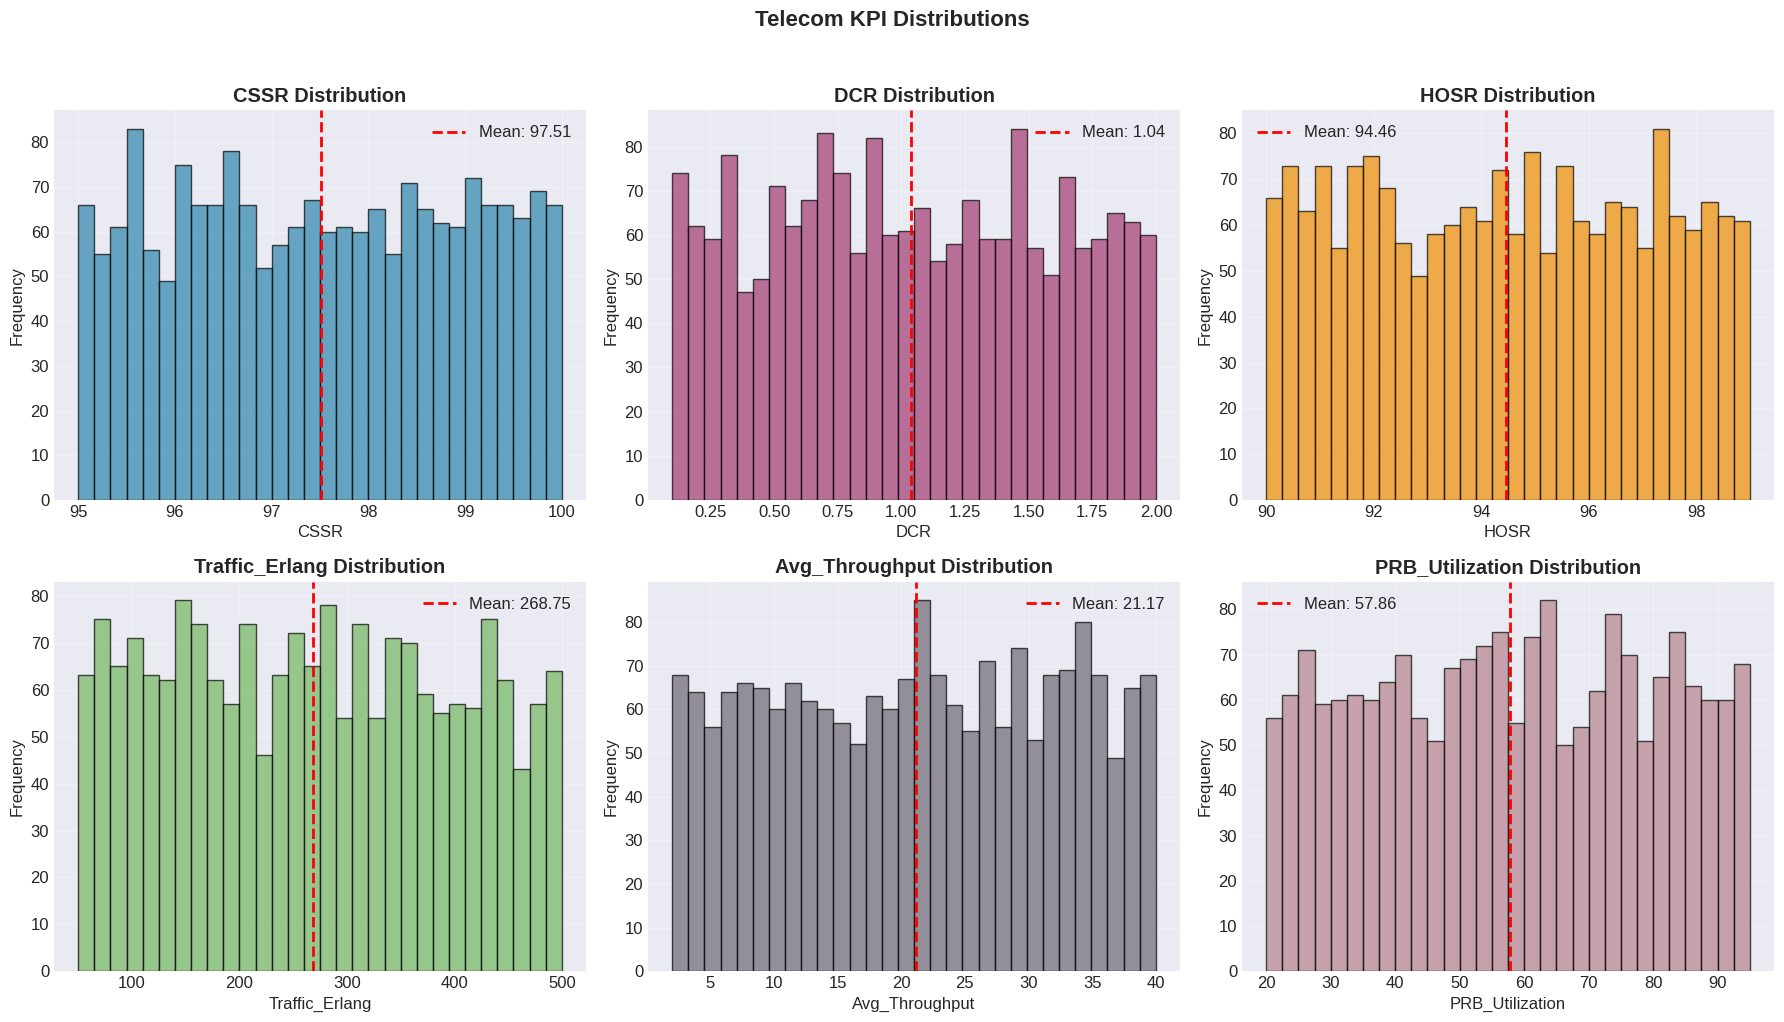

📱 Plotting Technology-wise Comparison...


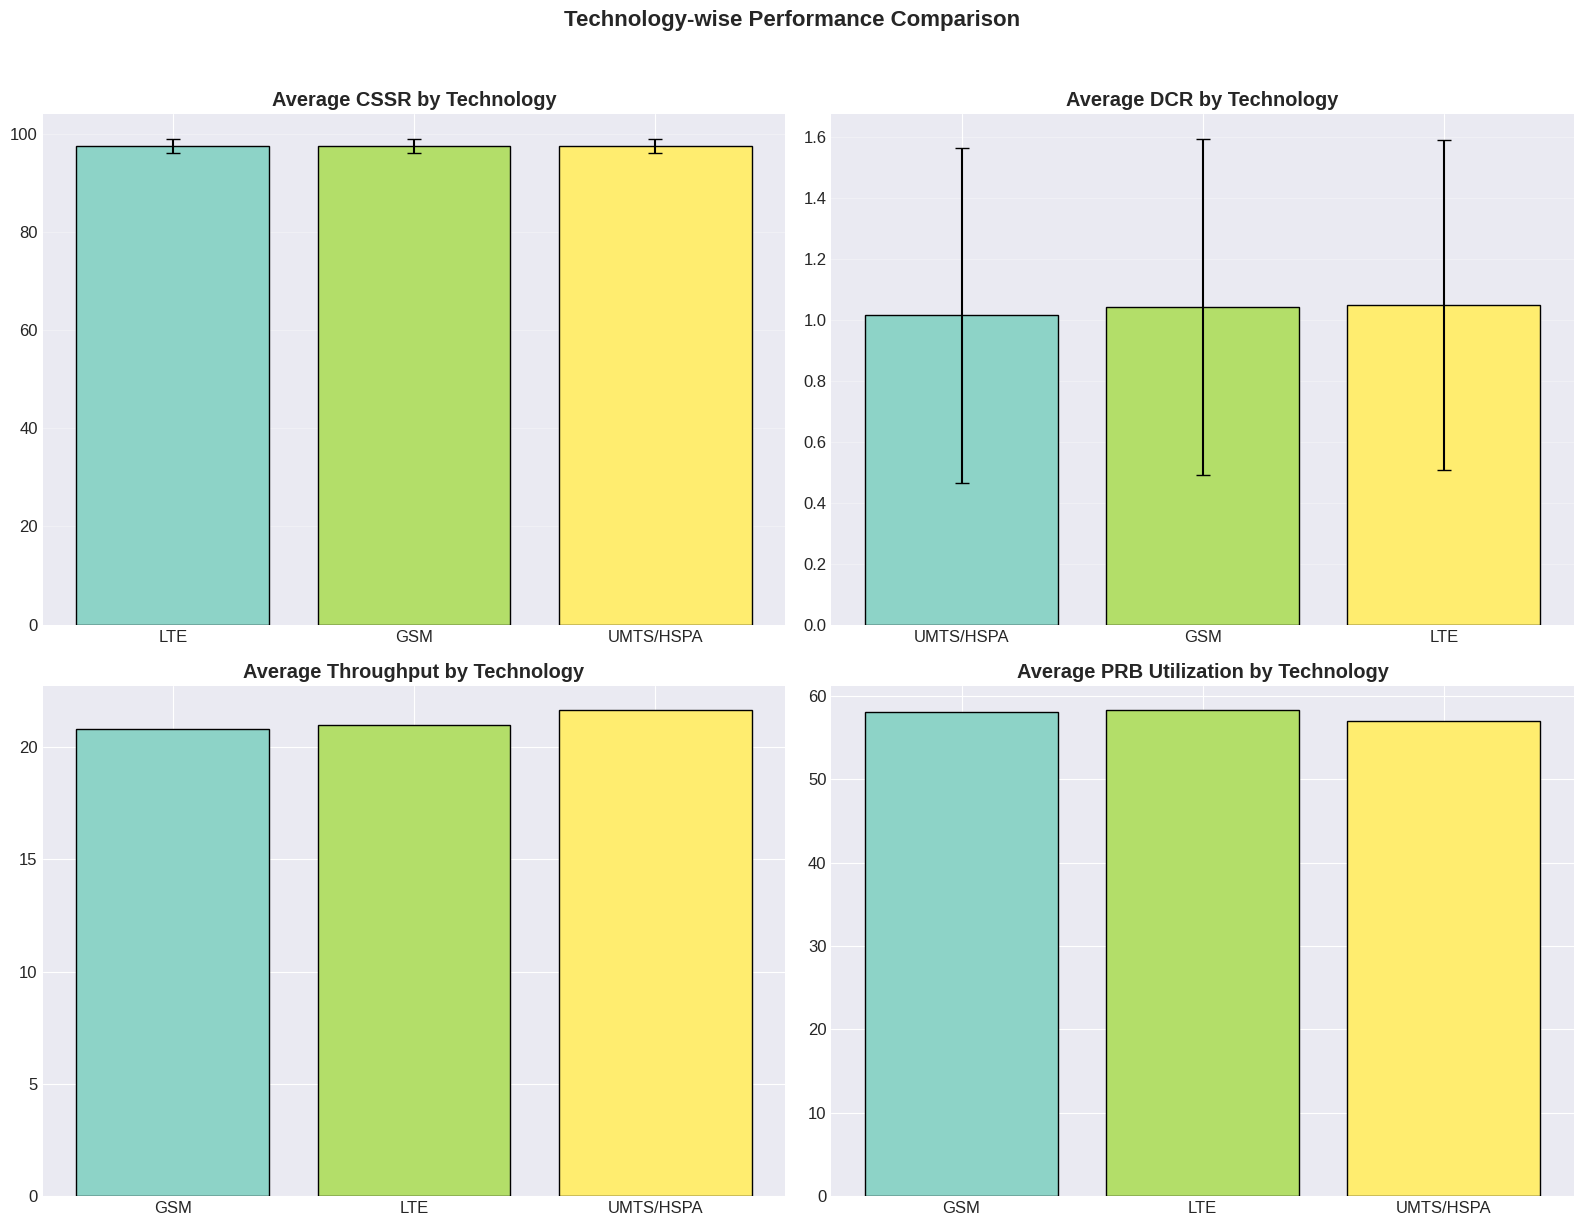

🗺️ Plotting Regional Performance Heatmap...


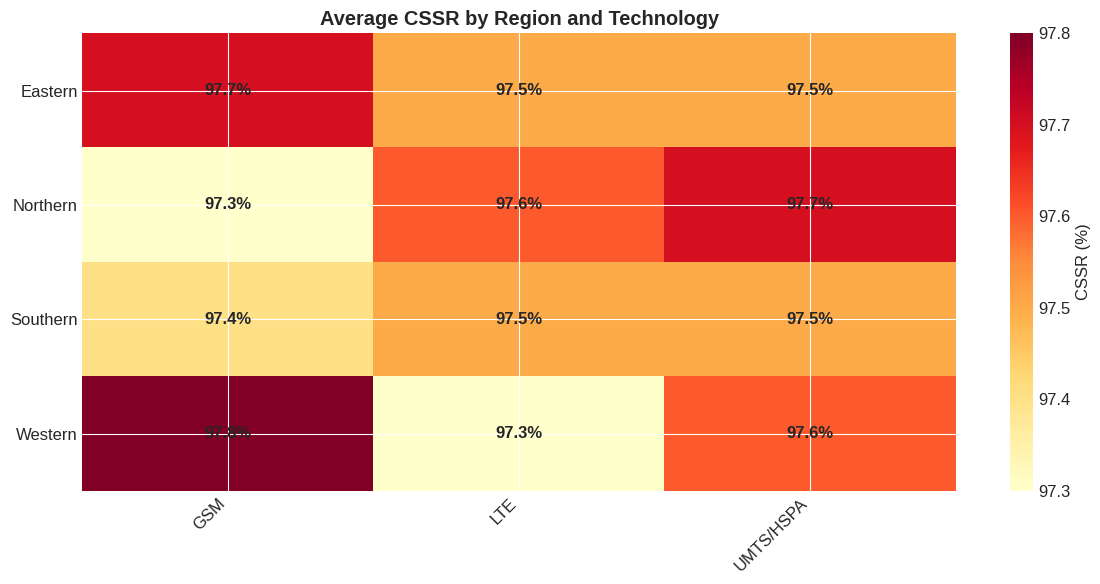

📊 Plotting Network Status Distribution...


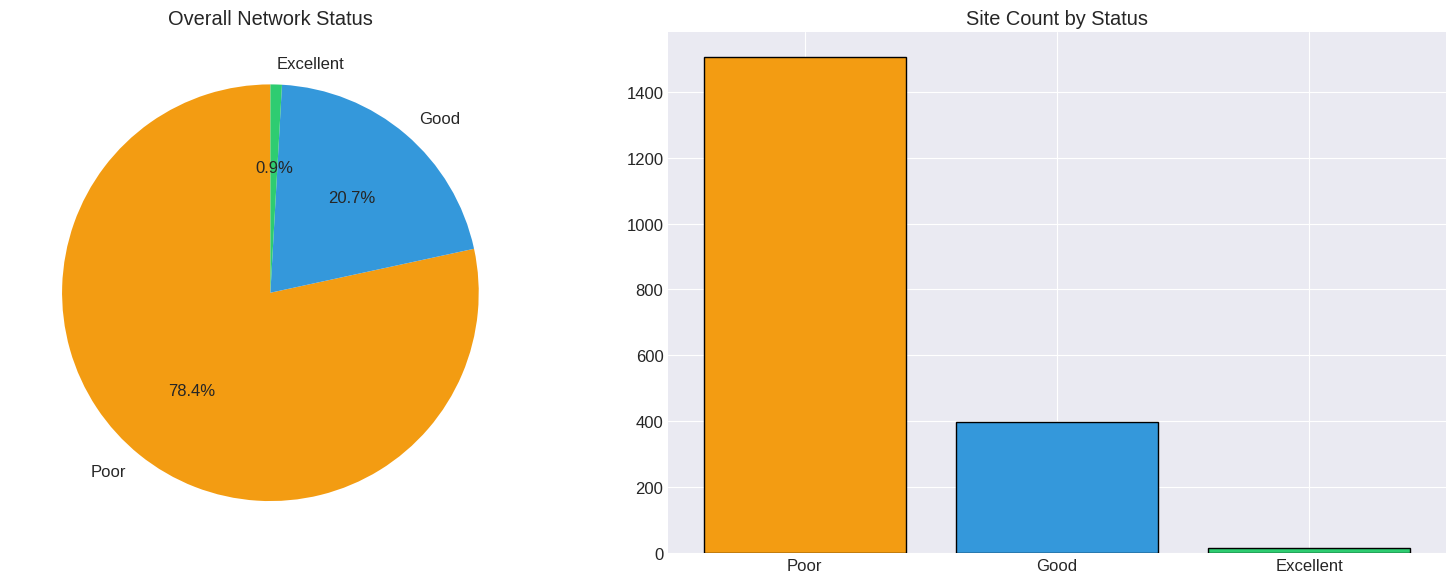

✅ All visualizations created and saved!


In [9]:
#@title 📊 **7. VISUALIZATIONS**
import os
os.makedirs("visualizations", exist_ok=True)

print("=" * 70)
print("📊 DATA VISUALIZATIONS")
print("=" * 70)

# Set figure size for all plots
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['font.size'] = 12

# =====================================================
# 1. KPI Distribution Plots
# =====================================================
print("📈 Plotting KPI Distributions...")

fig1, axes1 = plt.subplots(2, 3, figsize=(18, 10))
fig1.suptitle('Telecom KPI Distributions', fontsize=16, fontweight='bold', y=1.02)

kpi_plots = ['CSSR', 'DCR', 'HOSR', 'Traffic_Erlang', 'Avg_Throughput', 'PRB_Utilization']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#73B761', '#6D6875', '#B5838D']

for idx, (kpi, color) in enumerate(zip(kpi_plots, colors)):
    if kpi in df_kpi.columns:
        ax = axes1[idx // 3, idx % 3]

        data = df_kpi[kpi].dropna()
        if kpi in ['Traffic_Erlang', 'Avg_Throughput']:
            Q1, Q3 = data.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            data = data[(data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR)]

        ax.hist(data, bins=30, edgecolor='black', alpha=0.7, color=color)
        ax.set_title(f'{kpi} Distribution', fontweight='bold')
        ax.set_xlabel(kpi)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

        mean_val = data.mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {mean_val:.2f}')
        ax.legend()

plt.tight_layout()
fig1.savefig("visualizations/kpi_distributions.png", dpi=300, bbox_inches="tight")
plt.show()

# =====================================================
# 2. Technology-wise Comparison
# =====================================================
print("📱 Plotting Technology-wise Comparison...")

if 'Technology_Name' in df_kpi.columns:
    fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
    fig2.suptitle('Technology-wise Performance Comparison', fontsize=16, fontweight='bold', y=1.02)

    technologies = df_kpi['Technology_Name'].unique()
    tech_colors = plt.cm.Set3(np.linspace(0, 1, len(technologies)))

    tech_cssr = df_kpi.groupby('Technology_Name')['CSSR'].agg(['mean', 'std']).sort_values('mean')
    axes2[0, 0].bar(tech_cssr.index, tech_cssr['mean'],
                    yerr=tech_cssr['std'], capsize=5,
                    color=tech_colors, edgecolor='black')
    axes2[0, 0].set_title('Average CSSR by Technology', fontweight='bold')
    axes2[0, 0].grid(True, alpha=0.3, axis='y')

    tech_dcr = df_kpi.groupby('Technology_Name')['DCR'].agg(['mean', 'std']).sort_values('mean')
    axes2[0, 1].bar(tech_dcr.index, tech_dcr['mean'],
                    yerr=tech_dcr['std'], capsize=5,
                    color=tech_colors, edgecolor='black')
    axes2[0, 1].set_title('Average DCR by Technology', fontweight='bold')
    axes2[0, 1].grid(True, alpha=0.3, axis='y')

    if 'Avg_Throughput' in df_kpi.columns:
        tech_tp = df_kpi.groupby('Technology_Name')['Avg_Throughput'].mean()
        axes2[1, 0].bar(tech_tp.index, tech_tp.values,
                        color=tech_colors, edgecolor='black')
        axes2[1, 0].set_title('Average Throughput by Technology', fontweight='bold')

    if 'PRB_Utilization' in df_kpi.columns:
        tech_prb = df_kpi.groupby('Technology_Name')['PRB_Utilization'].mean()
        axes2[1, 1].bar(tech_prb.index, tech_prb.values,
                        color=tech_colors, edgecolor='black')
        axes2[1, 1].set_title('Average PRB Utilization by Technology', fontweight='bold')

    plt.tight_layout()
    fig2.savefig("visualizations/technology_comparison.png", dpi=300, bbox_inches="tight")
    plt.show()

# =====================================================
# 3. Region Performance Heatmap
# =====================================================
print("🗺️ Plotting Regional Performance Heatmap...")

if {'Region_Name', 'Technology_Name', 'CSSR'}.issubset(df_kpi.columns):

    region_tech_pivot = df_kpi.pivot_table(
        values='CSSR',
        index='Region_Name',
        columns='Technology_Name',
        aggfunc='mean'
    ).round(1)

    fig3, ax3 = plt.subplots(figsize=(12, 6))
    im = ax3.imshow(region_tech_pivot.values, cmap='YlOrRd', aspect='auto')

    ax3.set_xticks(np.arange(len(region_tech_pivot.columns)))
    ax3.set_yticks(np.arange(len(region_tech_pivot.index)))
    ax3.set_xticklabels(region_tech_pivot.columns)
    ax3.set_yticklabels(region_tech_pivot.index)
    plt.setp(ax3.get_xticklabels(), rotation=45, ha="right")

    for i in range(len(region_tech_pivot.index)):
        for j in range(len(region_tech_pivot.columns)):
            ax3.text(j, i, f"{region_tech_pivot.iloc[i, j]:.1f}%",
                     ha="center", va="center", fontweight='bold')

    ax3.set_title("Average CSSR by Region and Technology", fontweight='bold')
    fig3.colorbar(im, ax=ax3, label='CSSR (%)')

    plt.tight_layout()
    fig3.savefig("visualizations/region_technology_heatmap.png",
                 dpi=300, bbox_inches="tight")
    plt.show()

# =====================================================
# 4. Network Status Distribution
# =====================================================
print("📊 Plotting Network Status Distribution...")

if 'Overall_Status' in df_kpi.columns:
    fig4, (ax4a, ax4b) = plt.subplots(1, 2, figsize=(16, 6))

    status_counts = df_kpi['Overall_Status'].value_counts()
    colors = {'Excellent': '#2ECC71', 'Good': '#3498DB',
              'Poor': '#F39C12', 'Critical': '#E74C3C'}

    ax4a.pie(
        status_counts.values,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colors.get(s, '#95A5A6') for s in status_counts.index]
    )
    ax4a.set_title('Overall Network Status')

    ax4b.bar(status_counts.index, status_counts.values,
             color=[colors.get(s, '#95A5A6') for s in status_counts.index],
             edgecolor='black')
    ax4b.set_title('Site Count by Status')

    plt.tight_layout()
    fig4.savefig("visualizations/network_status_distribution.png",
                 dpi=300, bbox_inches="tight")
    plt.show()

print("✅ All visualizations created and saved!")


In [10]:
#@title 📄 **8. GENERATE EXCEL REPORT (FIXED)**
print("=" * 70)
print("📄 GENERATING EXCEL REPORT")
print("=" * 70)

import os
from datetime import datetime

# Create Excel writer
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_filename = f"Telecom_KPI_Report_{timestamp}.xlsx"

print(f"📁 Creating Excel report: {output_filename}")

try:
    # Create Excel writer
    excel_writer = pd.ExcelWriter(output_filename, engine='openpyxl')

    # 1. Raw Data with KPI Status
    print("   📋 Creating 'Raw_Data' sheet...")
    df_kpi.to_excel(excel_writer, sheet_name='Raw_Data', index=False)

    # 2. Executive Summary
    print("   📊 Creating 'Summary' sheet...")

    # Calculate summary metrics
    avg_cssr = df_kpi['CSSR'].mean() if 'CSSR' in df_kpi.columns else 0
    avg_dcr = df_kpi['DCR'].mean() if 'DCR' in df_kpi.columns else 0
    avg_hosr = df_kpi['HOSR'].mean() if 'HOSR' in df_kpi.columns else 0
    total_traffic = df_kpi['Traffic_Erlang'].sum() if 'Traffic_Erlang' in df_kpi.columns else 0
    avg_throughput = df_kpi['Avg_Throughput'].mean() if 'Avg_Throughput' in df_kpi.columns else 0

    summary_data = {
        'Metric': [
            'Report Date',
            'Total Sites Analyzed',
            'Date Range',
            'Technologies Covered',
            'Regions Covered',
            'Average CSSR',
            'Average DCR',
            'Average HOSR',
            'Total Traffic (Erlang)',
            'Average Throughput (Mbps)'
        ],
        'Value': [
            datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            len(df_kpi),
            f"{df_kpi['Date'].min().date()} to {df_kpi['Date'].max().date()}",
            ', '.join(sorted(df_kpi['Technology'].unique())),
            ', '.join(sorted(df_kpi['Region'].unique())),
            f"{avg_cssr:.2f}%",
            f"{avg_dcr:.2f}%",
            f"{avg_hosr:.2f}%",
            f"{total_traffic:,.0f}",
            f"{avg_throughput:.2f}"
        ]
    }
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_excel(excel_writer, sheet_name='Summary', index=False)

    # 3. Technology Performance
    if 'Technology_Name' in df_kpi.columns:
        print("   📱 Creating 'Technology_Performance' sheet...")
        tech_perf = df_kpi.groupby('Technology_Name').agg({
            'CSSR': ['count', 'mean', 'min', 'max', 'std'],
            'DCR': ['mean', 'min', 'max'],
            'HOSR': ['mean', 'min', 'max'],
            'Avg_Throughput': 'mean',
            'PRB_Utilization': 'mean'
        }).round(2)

        # Format column names
        tech_perf.columns = ['_'.join(col).strip() for col in tech_perf.columns.values]
        tech_perf.to_excel(excel_writer, sheet_name='Technology_Performance')

    # 4. Region Performance
    if 'Region_Name' in df_kpi.columns:
        print("   🗺️ Creating 'Region_Performance' sheet...")
        region_perf = df_kpi.groupby('Region_Name').agg({
            'CSSR': ['count', 'mean', 'min', 'max'],
            'DCR': ['mean', 'min', 'max'],
            'HOSR': ['mean', 'min', 'max'],
            'Site_ID': 'nunique'
        }).round(2)

        region_perf.columns = ['_'.join(col).strip() for col in region_perf.columns.values]
        region_perf = region_perf.rename(columns={'Site_ID_nunique': 'Unique_Sites'})
        region_perf.to_excel(excel_writer, sheet_name='Region_Performance')

    # 5. Top Performing Sites
    print("   🏆 Creating 'Top_Sites' sheet...")
    top_sites_report = df_kpi.nlargest(20, 'CSSR')[[
        'Site_ID', 'Technology', 'Region', 'Date', 'Week',
        'CSSR', 'DCR', 'HOSR', 'Avg_Throughput', 'Overall_Status'
    ]].sort_values('CSSR', ascending=False)
    top_sites_report.to_excel(excel_writer, sheet_name='Top_Sites', index=False)

    # 6. Sites Needing Attention
    print("   ⚠️ Creating 'Sites_Needing_Attention' sheet...")
    critical_sites = df_kpi[df_kpi['Overall_Status'].isin(['Critical', 'Poor'])]
    if len(critical_sites) > 0:
        attention_sites = critical_sites[[
            'Site_ID', 'Technology', 'Region', 'Date', 'Week',
            'CSSR', 'CSSR_Status', 'DCR', 'DCR_Status',
            'HOSR', 'HOSR_Status', 'Overall_Status'
        ]].sort_values(['Overall_Status', 'CSSR'])
        attention_sites.to_excel(excel_writer, sheet_name='Sites_Needing_Attention', index=False)

    # 7. Weekly Performance
    if 'Week' in df_kpi.columns:
        print("   📅 Creating 'Weekly_Performance' sheet...")
        weekly_perf = df_kpi.groupby('Week').agg({
            'CSSR': 'mean',
            'DCR': 'mean',
            'HOSR': 'mean',
            'Traffic_Erlang': 'sum',
            'Avg_Throughput': 'mean',
            'Site_ID': 'nunique'
        }).round(2).rename(columns={'Site_ID': 'Active_Sites'})
        weekly_perf.to_excel(excel_writer, sheet_name='Weekly_Performance')

    # Save the Excel file
    excel_writer.close()

    # Get file size
    file_size = os.path.getsize(output_filename) / 1024 / 1024  # Convert to MB
    print(f"\n✅ Excel report created successfully: {output_filename}")
    print(f"📊 File size: {file_size:.2f} MB")

    print("\n📑 Sheets included in the report:")
    print("  1. Raw_Data - Complete dataset with KPI status")
    print("  2. Summary - Executive summary")
    print("  3. Technology_Performance - Technology-wise analysis")
    print("  4. Region_Performance - Region-wise analysis")
    print("  5. Top_Sites - Best performing sites")
    print("  6. Sites_Needing_Attention - Sites requiring attention")
    if 'Week' in df_kpi.columns:
        print("  7. Weekly_Performance - Weekly trend analysis")

except Exception as e:
    print(f"❌ Error creating Excel report: {str(e)}")
    import traceback
    traceback.print_exc()

# Download the file
print("\n⬇️ Downloading the report...")
try:
    from google.colab import files
    files.download(output_filename)
    print("✅ Report downloaded successfully!")
except Exception as e:
    print(f"⚠️ Could not download automatically. File is saved as: {output_filename}")
    print("You can download it manually from the Files tab on the left.")

📄 GENERATING EXCEL REPORT
📁 Creating Excel report: Telecom_KPI_Report_20260128_185859.xlsx
   📋 Creating 'Raw_Data' sheet...
   📊 Creating 'Summary' sheet...
   📱 Creating 'Technology_Performance' sheet...
   🗺️ Creating 'Region_Performance' sheet...
   🏆 Creating 'Top_Sites' sheet...
   ⚠️ Creating 'Sites_Needing_Attention' sheet...
   📅 Creating 'Weekly_Performance' sheet...

✅ Excel report created successfully: Telecom_KPI_Report_20260128_185859.xlsx
📊 File size: 0.30 MB

📑 Sheets included in the report:
  1. Raw_Data - Complete dataset with KPI status
  2. Summary - Executive summary
  3. Technology_Performance - Technology-wise analysis
  4. Region_Performance - Region-wise analysis
  5. Top_Sites - Best performing sites
  6. Sites_Needing_Attention - Sites requiring attention
  7. Weekly_Performance - Weekly trend analysis

⬇️ Downloading the report...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Report downloaded successfully!
